In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [17]:
df=pd.read_csv('Boston_dataset.csv')


In [18]:
print(df.describe())


              age           B        chas       cmedv        crim         dis  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901  356.674032    0.069170   22.528854    3.613524    3.795043   
std     28.148861   91.294864    0.253994    9.182176    8.601545    2.105710   
min      2.900000    0.320000    0.000000    5.000000    0.006320    1.129600   
25%     45.025000  375.377500    0.000000   17.025000    0.082045    2.100175   
50%     77.500000  391.440000    0.000000   21.200000    0.256510    3.207450   
75%     94.075000  396.225000    0.000000   25.000000    3.677082    5.188425   
max    100.000000  396.900000    1.000000   50.000000   88.976200   12.126500   

            indus         lat         lon       lstat        medv         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    11.136779   42.216440  -71.056389   12.653063   22.532806    0.554695   
std      6.860353    0.0617

DECIMAL SCALING 


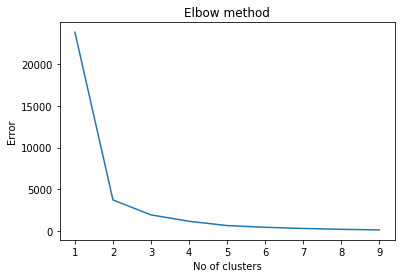

In [19]:
data=pd.DataFrame()
print("DECIMAL SCALING ")
data["nox"] = df['nox']
data["indus"]=df['indus']
x = data.iloc[0:, [0,1]].values
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt

plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

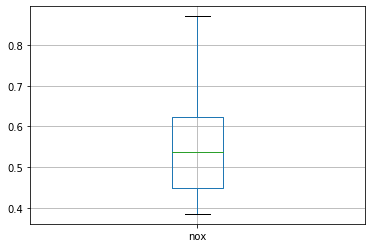

In [21]:
df.boxplot(column=['nox'], return_type='axes');


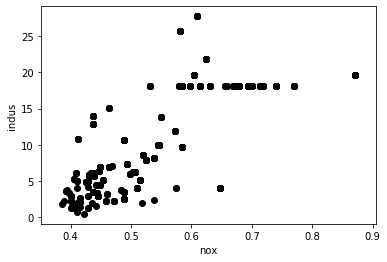

In [22]:

x = data[["indus","nox"]]
#Visualise data points
plt.scatter(x["nox"],x["indus"],c='black')
plt.xlabel('nox')
plt.ylabel('indus')
plt.show()

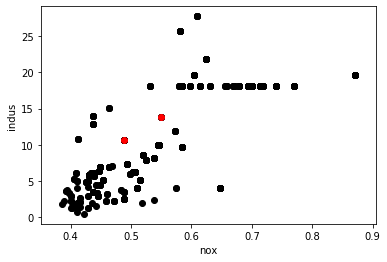

In [23]:
#number of clusters
K=2

# Select random observation as centroids
Centroids = (x.sample(n=K))
plt.scatter(x["nox"],x["indus"],c='black')
plt.scatter(Centroids["nox"],Centroids["indus"],c='red')
plt.xlabel('nox')
plt.ylabel('indus')
plt.show()

In [24]:
diff = 1
j=0

while(diff!=0):
    XD=x
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["nox"]-row_d["nox"])**2
            d2=(row_c["indus"]-row_d["indus"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        x[i]=ED
        i=i+1

    C=[]
    for index,row in x.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    x["Cluster"]=C
    Centroids_new = x.groupby(["Cluster"]).mean()[["indus","nox"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['indus'] - Centroids['indus']).sum() + (Centroids_new['nox'] - Centroids['nox']).sum()
        print(diff.sum())
    Centroids = x.groupby(["Cluster"]).mean()[["indus","nox"]]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.0


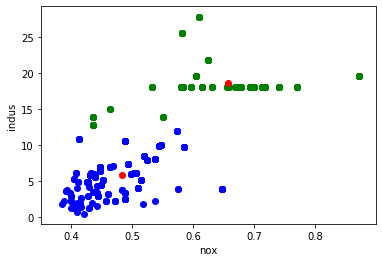

In [25]:
color=['blue','green','yellow']
for k in range(K):
    data=x[x["Cluster"]==k+1]
    plt.scatter(data["nox"],data["indus"],c=color[k])
plt.scatter(Centroids["nox"],Centroids["indus"],c='red')
plt.xlabel('nox')
plt.ylabel('indus')
plt.show()